# SCORE DE PROPENSION ET APPARIEMENT

Cette application s'inspire de l'article de Douglas Almond, Kenneth Y. Chay, and David S. Lee : "The Costs of Low Birth Weight", *Quarterly Journal of Economics*, 120(3):1031-1083.

L'objectif : étudier l'effet causal du fait que les mères fument durant leur grossesse sur le poids des enfants à la naissance. Connaître les déterminants du poids à la naissance hors facteurs génétiques est crucial car le poids à la naissance a une importante répercussion sur une série de variables en santé, développement, éducation, et *in fine* revenu des enfants.

Les données sont issues du registre des naissances de Pennsylvanie en 1993. Chaque ligne rapporte des observations sur la mère et son enfant. Le codebook est disponible : **TD7_codebook.txt**.

## 1. Intuition et modèle linéaire

Dans ce contexte, quelle est notre variable d'intérêt ou résultat ? Notre variable de traitement ? Identifiez ces variables dans le codebook : **TD7_codebook.txt**.

Ouvrir les données **TD7_ps1_postdrop.dta**. 

In [1]:
#ouvrir
library(foreign)
d<-

On souhaite travailler sur le sous échantillon des femmes de 32 ans. Créer le sous-échantillon que l'on nommera d. 

In [2]:
d<-

Estimer le modèle simple. Quelle interprétation donner des résultats ? Doit-on interdire aux femmes enceintes de fumer au vu de ces résultats ?

In [3]:
#inspecter tobacco et recoder en une dummy qui vaut 1 si la mère est fumeuse, 0 sinon

#estimer le modèle simple
simple<-


   1    2 
 770 5787 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    227    3105    3459    3424    3799    5897 


   0    1 
5787  770 


Call:
lm(formula = dbrwt ~ tobacco, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-3228.1  -308.1    31.9   371.9  2441.9 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3455.057      7.687  449.44   <2e-16 ***
tobacco     -260.951     22.433  -11.63   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 584.8 on 6555 degrees of freedom
Multiple R-squared:  0.02023,	Adjusted R-squared:  0.02008 
F-statistic: 135.3 on 1 and 6555 DF,  p-value: < 2.2e-16


Supposons que le fait pour une mère de fumer ou non est assigné de manière aléatoire, conditionnellement à d'autres variables prédéterminées qui déterminent le poids de l'enfant à la naissance. 

a) Quelle méthode économétrique utiliseriez-vous ? 

b) Quelles variables de contrôle choisiriez-vous ?

c) Quelle est la source de mauvaise spécification du modèle si on choisit cette forme ? 

Estimer le modèle multiple avec les variables prédéterminées : *pldel3* *ormoth* *mrace3* *dmeduc* *dmar* *dfage* *orfath* *dfeduc*.

In [4]:
#estimer ce modèle que l'on nommera multiple
#multiple<-


Call:
lm(formula = dbrwt ~ tobacco + pldel3 + ormoth + mrace3 + dmeduc + 
    dmar + dfage + orfath + dfeduc, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-3261.8  -314.6    28.4   365.6  2432.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3487.267    108.640  32.099  < 2e-16 ***
tobacco     -229.332     23.696  -9.678  < 2e-16 ***
pldel3       155.799     51.785   3.009 0.002635 ** 
ormoth       -16.400     25.088  -0.654 0.513332    
mrace3      -118.927     15.620  -7.614 3.04e-14 ***
dmeduc        -2.580      4.259  -0.606 0.544690    
dmar         -98.892     29.107  -3.398 0.000684 ***
dfage          2.994      1.752   1.708 0.087607 .  
orfath       -18.057     22.101  -0.817 0.413954    
dfeduc        -1.133      3.985  -0.284 0.776199    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 580 on 6547 degrees of freedom
Multiple R-squared:  0.03728,	Adjusted R-squared:  0.03596 
F-s

## 2. Création du score de propension

Décrivez en quelques lignes en quoi consiste le score de propension et comment il contribue à estimer l'effet moyen causal du traitement (ici : le fait de fumer durant la grossesse) quand le traitement est assigné de manière aléatoire une fois conditionné par les variables prédéterminées.

Décrivez en quelques lignes comment s'obtient le score de propension que nous notons $\hat{p}_{i}$ dans le modèle et que nous nommons *pr_score* dans les données.

On estime le score de propension : 

In [5]:
propensity <- glm(tobacco ~  dmage+ dmeduc+ dmar
                     +dfage +dfeduc+ phyper +pre4000+ alcohol +wgain, binomial(probit), data=d)
summary(propensity)


Call:
glm(formula = tobacco ~ dmage + dmeduc + dmar + dfage + dfeduc + 
    phyper + pre4000 + alcohol + wgain, family = binomial(probit), 
    data = d)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1827  -0.5254  -0.3467  -0.2453   2.9261  

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.330409   0.633429   2.100   0.0357 *  
dmage              NA         NA      NA       NA    
dmeduc      -0.098972   0.013097  -7.557 4.13e-14 ***
dmar         0.827510   0.062030  13.340  < 2e-16 ***
dfage        0.010641   0.004910   2.167   0.0302 *  
dfeduc      -0.093560   0.012056  -7.760 8.46e-15 ***
phyper       0.216990   0.157036   1.382   0.1670    
pre4000      0.476016   0.192413   2.474   0.0134 *  
alcohol     -1.272093   0.162973  -7.806 5.92e-15 ***
wgain       -0.002334   0.001903  -1.227   0.2200    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion p

Etes-vous d'accord avec cette estimation ? 

Estimez à nouveau le score de propension avec les variables prédéterminées : *pldel3* *ormoth* *mrace3* *dmeduc* *dmar* *dfage* *orfath* *dfeduc*

In [6]:
#propensity <- 


Call:
glm(formula = tobacco ~ ormoth + mrace3 + dmeduc + dmar + dfage + 
    orfath + dfeduc + pldel3, family = binomial(probit), data = d)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2904  -0.5348  -0.3454  -0.2363   3.4184  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.610459   0.373945   4.307 1.66e-05 ***
ormoth      -0.345688   0.120642  -2.865  0.00416 ** 
mrace3      -0.055118   0.043504  -1.267  0.20517    
dmeduc      -0.108004   0.013274  -8.137 4.06e-16 ***
dmar         0.884411   0.067610  13.081  < 2e-16 ***
dfage        0.010925   0.004909   2.225  0.02605 *  
orfath      -0.001063   0.073745  -0.014  0.98850    
dfeduc      -0.103257   0.012189  -8.471  < 2e-16 ***
pldel3      -1.230580   0.233267  -5.275 1.32e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4744.3  on 6556  degrees of freedom
Residual 

On souhaite montrer graphiquement la distribution du score de propension selon le groupe (unités traitées, unités de contrôle -- ici mères fumeuses ou non-fumeuses), ainsi qu'un tableau donnant les statistiques descriptives de ce score par groupe. Pour cela on doit d'abord prédire le score :

In [7]:
#on prédit le score: 
prs_df <- data.frame(pr_score = predict(propensity, type = "response"),
                     tobacco = d$tobacco)

Examinez les 6 premières lignes de ce dataframe : 

,pr_score,tobacco
2,0.42075635,0
5,0.16444173,1
10,0.06122157,0
16,0.13669384,0
18,0.06776432,0
45,0.04446675,0


On adopte deux types de représentations graphiques du support commun : un hisogramme séparé, ou une estimation empirique de la densité par fonction noyau (les deux graphiques donnent la même information sur la qualité du support commun des scores estimés) :


Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



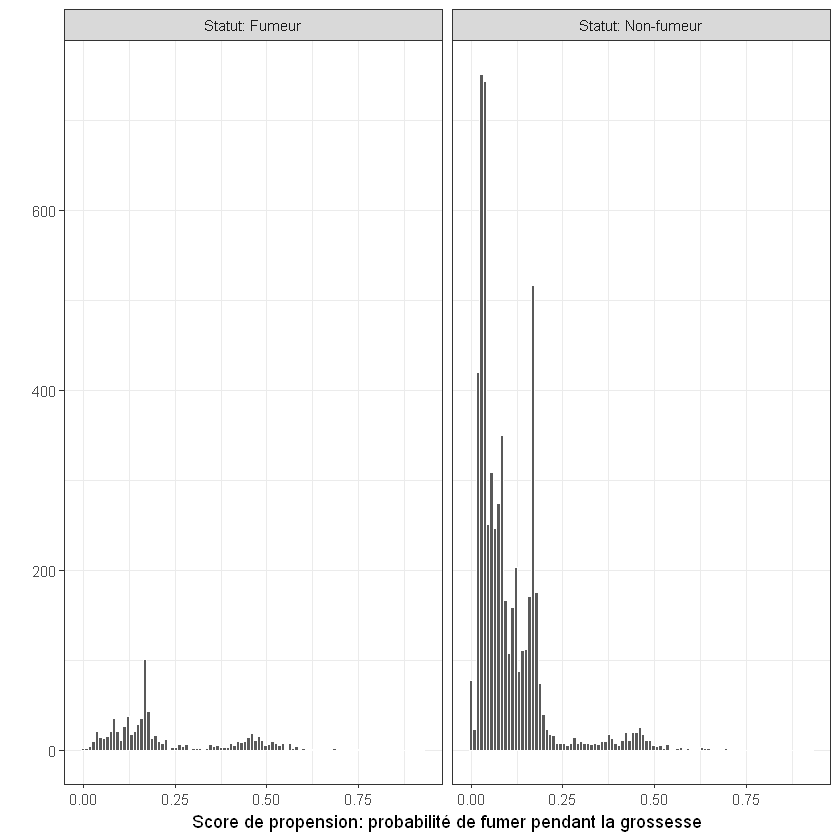

In [9]:
##histogramme :
library(plyr)
library(dplyr)
library(ggplot2)
labs <- paste("Statut:", c("Fumeur", "Non-fumeur"))
prs_df %>%
  mutate(tobacco = ifelse(tobacco == 1, labs[1], labs[2])) %>%
  ggplot(aes(x = pr_score)) +
  geom_histogram(color = "white", bins=100) +
  facet_wrap(~tobacco) +
  xlab("Score de propension: probabilité de fumer pendant la grossesse") +
  ylab("") +
  theme_bw()

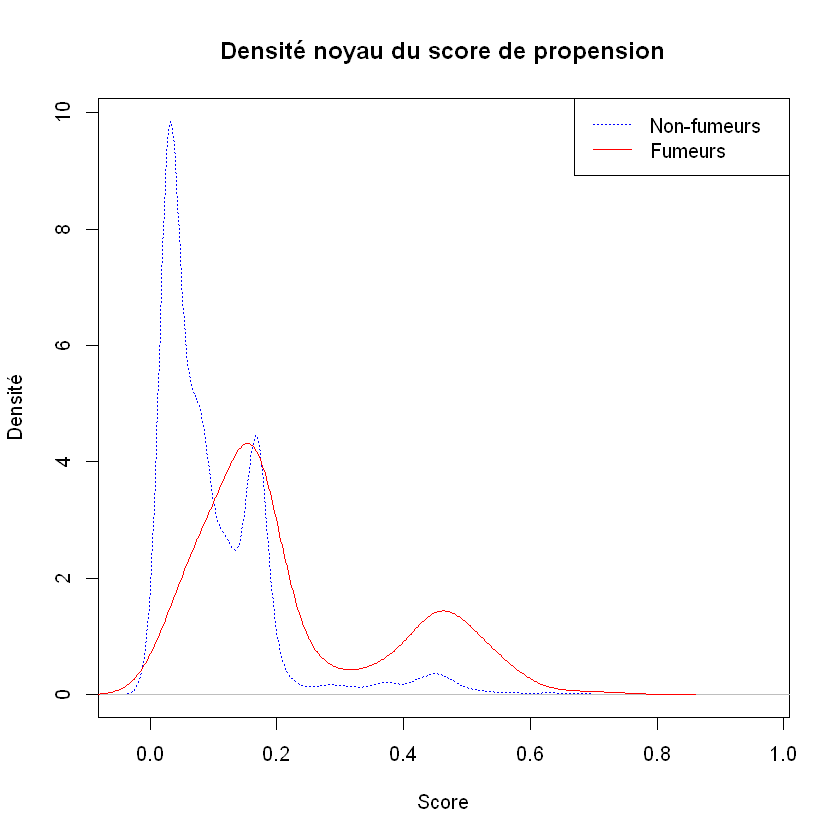

In [10]:
#ou encore densité empirique : 
plot(density(prs_df$pr_score[
  prs_df$tobacco==0]),col="blue",lty="dotted",main="Densité noyau du score de propension",ylab="Densité",xlab="Score")
lines(density(prs_df$pr_score[
  prs_df$tobacco==1]), col="red")
legend("topright", c("Non-fumeurs","Fumeurs"), lty = c(3,1), col = c("blue","red"))

Qu'en conclure ? 

Que faire pour améliorer la qualité du support commun ?

In [11]:
summary(prs_df$pr_score[prs_df$tobacco==0])
summary(prs_df$pr_score[prs_df$tobacco==1])

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0001324 0.0342722 0.0729724 0.1023786 0.1501191 0.9274084 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.002901 0.116557 0.167162 0.225582 0.351488 0.746474 

## 3. Estimations avec score de propension

Nous utilisons $\hat{p}_{i}$ pour améliorer l'estimation de l'effet causal du fait de fumer sur le poids des nouveaux-nés. Commencer par ajouter le score *pr_score* au dataframe *d* et trimmer les données.

In [12]:
#ajout du score de propension dans le dataframe d


#trimming: suppression des observations pour lesquelles il n'y a pas de contrefactuel:


[1] 6557   49

[1] 6486   49

### 3.1 Utilisation directe du score de propension

Nous introduisons d'abord $\hat{p}_{i}$ comme variable dans l'équation simple: $dbrwt_{i} = \gamma D_{i} + u_{i}$. Estimer. Quel est l'effet moyen du traitement ? Commenter.

In [13]:
#estimation
#simple_p <- 


Call:
lm(formula = dbrwt ~ tobacco + pr_score, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-3233.5  -315.5    27.2   369.4  2433.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3480.78      10.42 334.132  < 2e-16 ***
tobacco      -227.09      23.93  -9.491  < 2e-16 ***
pr_score     -264.15      67.89  -3.891 0.000101 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 584.3 on 6483 degrees of freedom
Multiple R-squared:  0.02246,	Adjusted R-squared:  0.02216 
F-statistic: 74.49 on 2 and 6483 DF,  p-value: < 2.2e-16


Pourquoi l'introduction du score de propension n'a-t-elle que peu de valeur ajoutée pour résoudre notre problème de sélection sur observables par rapport à un modèle linéaire classique ?  

In [14]:
#pour rappel:
coef(simple)[2]
coef(multiple)[2]
coef(simple_p)[2]

tobacco 
-260.9515

tobacco 
-229.3317

tobacco 
-227.0885

### 3.2 Pondération par le score de propension

Nous utilisons la méthode proposée par Hirano, Imbens et Ridder (2003) de pondération par score de propension.

a) Donner la formule de la pondération.

b) Expliquer en quoi cette pondération permet de mieux mesurer l'effet moyen du traitement. 

Créer le poids. 

In [15]:
#poids
#d$w <- 

Pour introduire les poids dans la régression, on utilise l'option **weights=** dans **lm()**. 
Estimer le modèle. Quel est l'effet moyen du traitement ?

In [16]:
#estimation
#reweight <- 
#reweight_withcontrols <- 
coef(reweight)[2]
coef(reweight_withcontrols)[2]
#pour rappel:
coef(simple)[2]
coef(multiple)[2]
coef(simple_p)[2]

tobacco 
-165.2572

tobacco 
-208.4817

tobacco 
-260.9515

tobacco 
-229.3317

tobacco 
-227.0885

Quel est le principal avantage de cette approche ? Le principal désavantage ? 

### 3.3 Estimation par bloc sur le score de propension

Nous utilisons la méthode proposée par Dehejia et Wahba (2002). 

a) Comment fonctionne la stratification ? Pourquoi le support commun est-il particulièrement crucial ? 

b) On calcule l'effet moyen du traitement grâce à 100 blocs. On obtient : $\hat{\tau}=-213,62$. Expliquez les différentes étapes du calcul. 

c) Que faudrait-il vérifier au sein de chaque bloc ? 


### 3.4 Appariement par le score de propension

Le score de propension peut être mobilisé pour construire un groupe de contrôle qui ressemble au groupe de traitement : ce sont les techniques d'appariement par score de propension. 

Citez une méthode simple d'appariement par score de propension.

On souhaite calculer l'effet moyen du traitement avec cette méthode. A combien d'appariement va-t-on procéder ?

In [17]:
table(d$tobacco) 


   0    1 
5716  770 

On estime le modèle avec appariement par le plus proche voisin (sur un sous-échantillon des fumeuses de 32 ans). Pour cela :
- on charge le package "MatchIt" (et s'il le faut on l'installe d'abord)
- on cherche les plus proches voisins avec la fonction matchit(y~x, method="nearest", data=...), où y est le traitement, et x le score
- on génère le dataframe qui inclut les observations traitées et leur plus proche voisin
- on analyse la qualité de l'appariement


Chargement :

In [18]:
#a)package
install.packages("MatchIt")
library(MatchIt)

package 'MatchIt' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lmartinoty\AppData\Local\Temp\Rtmpy2yuEk\downloaded_packages


Recherche des plus proches voisins : 

In [19]:
#b)plus proches voisins
voisins <- matchit(tobacco ~ pr_score,
                     method = "nearest", data = d)

Constitution du dataframe :

In [20]:
#c)dataframe
matchedsample <- match.data(voisins)
#soit NT le nombre d'unités dans le groupe de traitement, on a bien NT*2 observations (1 contrôle pour chaque traité T)
dim(matchedsample) 

[1] 1540   52

Qualité de l'appariement : refaire le graphique de votre choix de la partie 2 (histogramme ou densité), avec le dataframe crée ci-dessus.

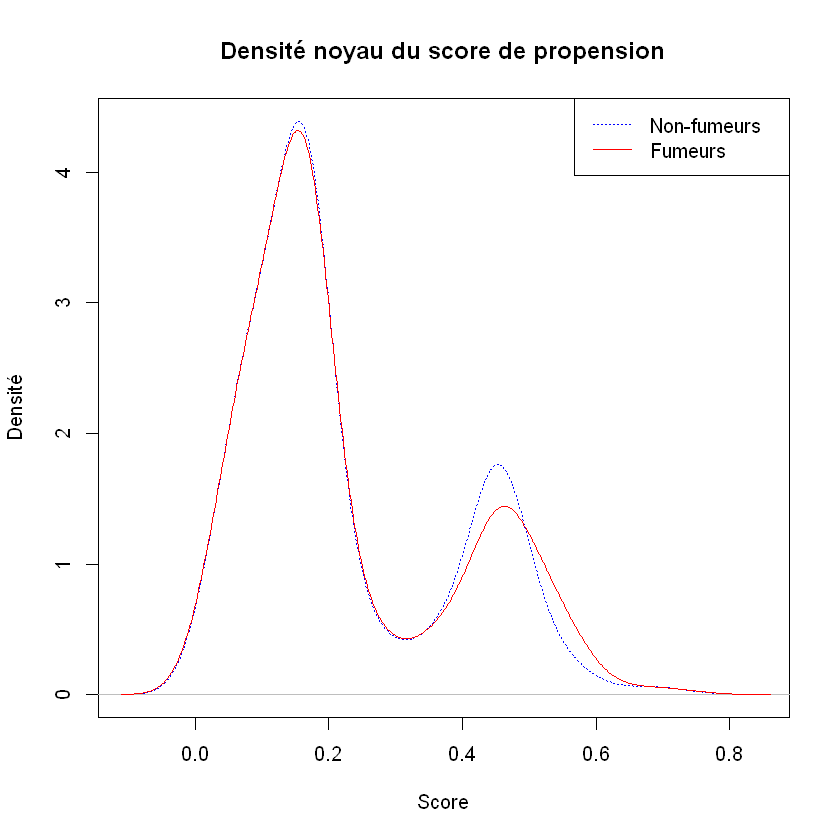

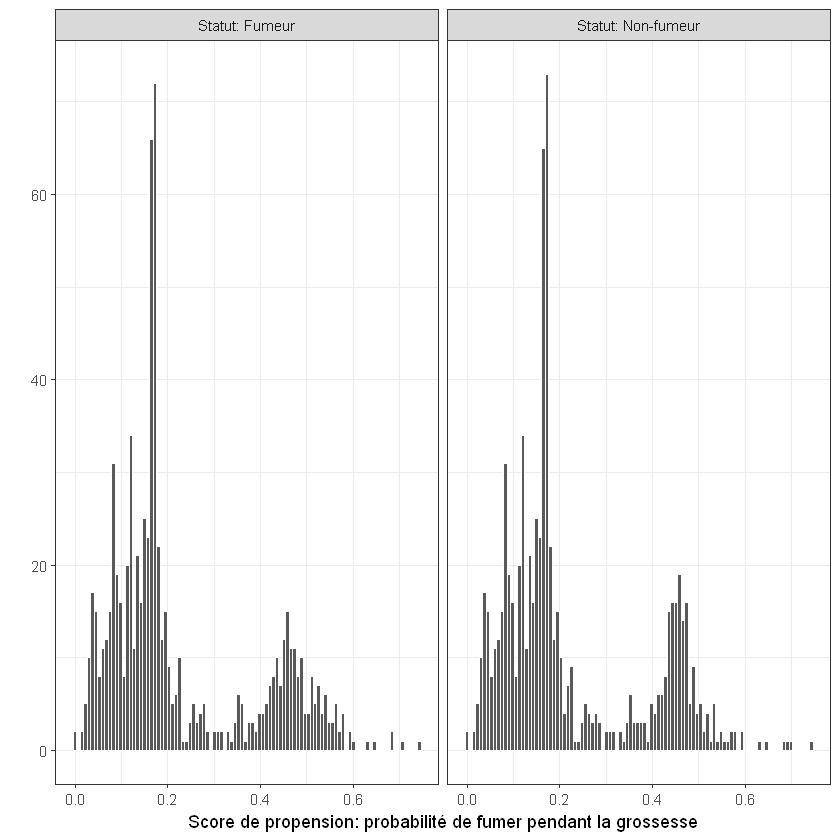

In [21]:
#d)quality of nearest neighbour: 

#densité
plot(density(matchedsample$pr_score[
  matchedsample$tobacco==0]),col="blue",lty="dotted",main="Densité noyau du score de propension",ylab="Densité",xlab="Score")
lines(density(matchedsample$pr_score[
  matchedsample$tobacco==1]), col="red")
legend("topright", c("Non-fumeurs","Fumeurs"), lty = c(3,1), col = c("blue","red")) 


Call:
matchit(formula = tobacco ~ pr_score, data = d, method = "nearest")

Summary of balance for all data:
         Means Treated Means Control SD Control Mean Diff eQQ Med eQQ Mean
distance        0.2227        0.1047     0.0943    0.1179  0.0559   0.1176
pr_score        0.2256        0.1029     0.0978    0.1227  0.0951   0.1224
         eQQ Max
distance  0.4301
pr_score  0.3105


Summary of balance for matched data:
         Means Treated Means Control SD Control Mean Diff eQQ Med eQQ Mean
distance        0.2227        0.2174     0.1806    0.0052       0   0.0053
pr_score        0.2256        0.2223     0.1533    0.0033       0   0.0034
         eQQ Max
distance  0.0621
pr_score  0.0388

Percent Balance Improvement:
         Mean Diff. eQQ Med eQQ Mean eQQ Max
distance    95.5555     100  95.4591 85.5683
pr_score    97.3109     100  97.2321 87.5100

Sample sizes:
          Control Treated
All          5716     770
Matched       770     770
Unmatched    4946       0
Discarded       

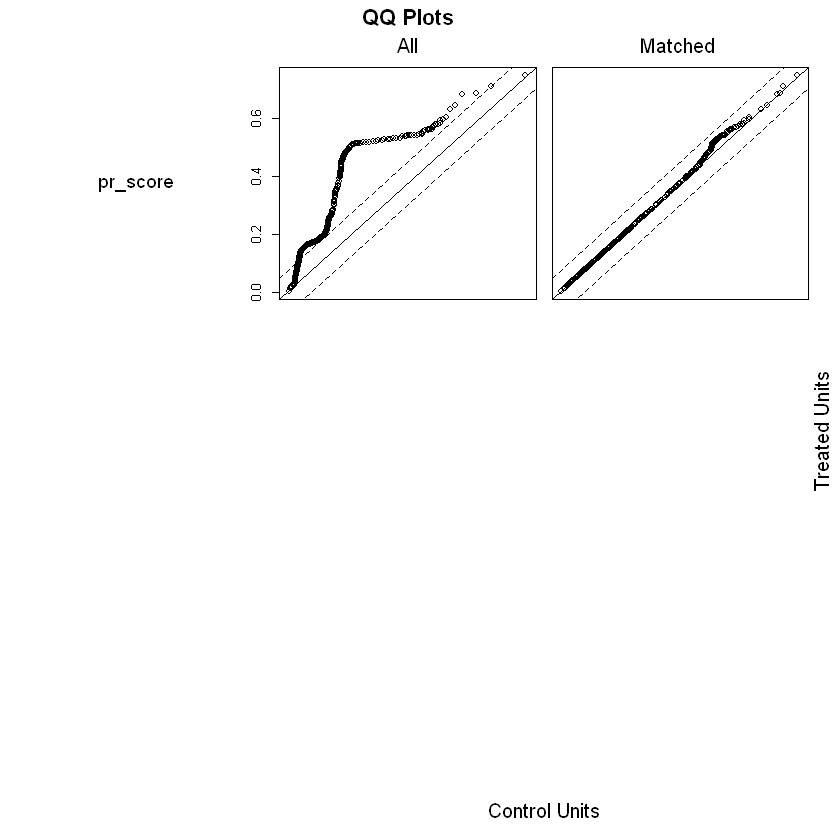

In [22]:
#NOTE : MatchIt donne des informations sur la qualité de l'appariemment :
#summary(voisins) 
#plot(voisins)

Estimer le modèle simple sur les données appariées.

In [23]:
nn <- lm(dbrwt ~ tobacco, data=matchedsample)
c(coef(nn)[2],     confint(nn)[2,])

tobacco     2.5 %    97.5 % 
-225.9156 -285.9732 -165.8580

On peut représenter graphiquement les effets mesurés par les différents modèles estimés :

In [24]:
#modèle simple
est1<-coef(simple)[2]
c1<-confint(simple)[2,]

#multiple


#modèle simple avec score


#modèle repondéré simple


#modèle repondéré multiple

#appariement par le plus plus proche voisin


In [1]:
#création du data frame 


ERROR: Error in data.frame(est = c(est1, est2, est3, est4, est5, est6), c_inf = c(c1[1], : objet 'est1' introuvable


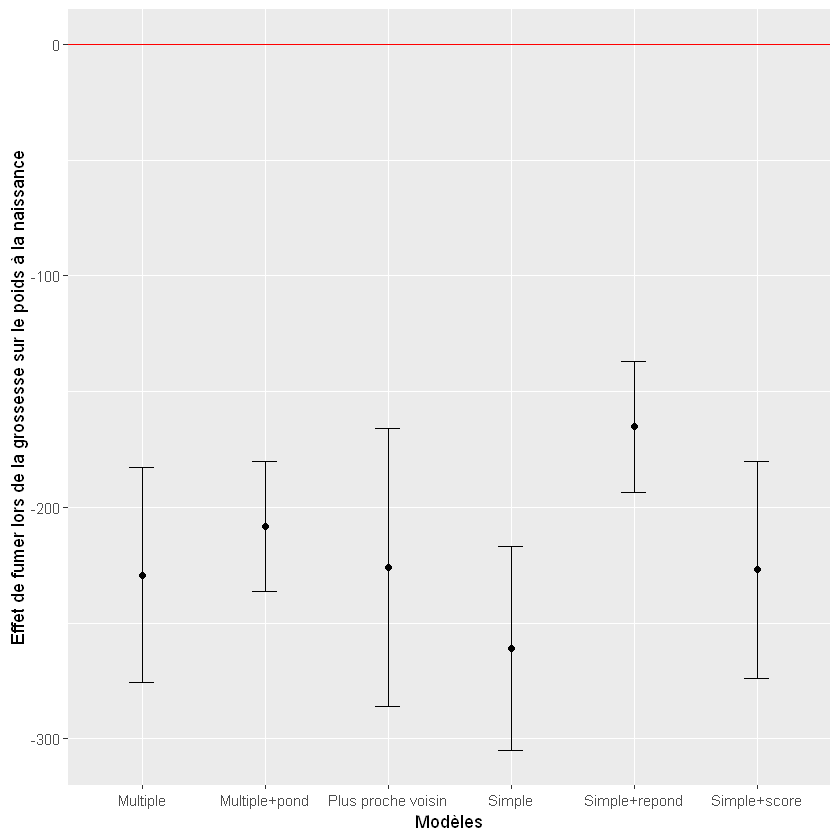

In [26]:
#graphique
